In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import random

In [70]:
data = pd.read_csv('/kaggle/input/salary/Salary.csv')

In [71]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [72]:
# splite data to input and reshape it make the matrices product work, and output
x = data['YearsExperience']
x = (x - np.mean(x))/ statistics.stdev(x)
x = np.array(x).reshape(x.size,1)
# y is the actual output
y = data['Salary']
y = np.array(y)
y = (y - np.mean(y))/ statistics.stdev(y)

In [73]:
# function to intialize the weights and bias randomly
def initialize(dim):
    b = random.random()
    w = np.random.rand(dim)
    return b, w

In [74]:
# dimentions of this data set input is one
dim = 1
b, w = initialize(dim)
print("bias ",b,"weights ",w)

bias  0.5274618372329076 weights  [0.39092675]


In [75]:
# function to predict the output
def predict_y(x,w,b):
    return b + np.dot(x,w)

y_hat = predict_y(x,w,b)
y_hat[0:1]

array([-0.03523214])

In [76]:
# calculate the error sum((y-y_hat)**2)
import math
def get_cost(y,y_hat):
    y_resd=y - y_hat
    return np.sum(np.dot(y_resd.T, y_resd))
y_hat = predict_y(x,w,b)
get_cost(y,y_hat)

22.81768390241685

In [77]:
print(x.shape)
print(y.shape)
print(y_hat.shape)
print(w.shape)

(35, 1)
(35,)
(35,)
(1,)


In [78]:
def predict(x,w,b):
    return x*w+b

In [79]:
def f_derivative_w_b(x,y,w,b):
    summation_w = 0
    summation_b = 0
    number_of_samples = len(y)
    for i in range(number_of_samples):
        summation_w += (predict(x[i],w,b)-y[i])*x[i]
        summation_b += (predict(x[i],w,b)-y[i])
    return summation_w /number_of_samples, summation_b /number_of_samples

In [80]:
def model_fit(x,y,w,b,lr,iteration):
    w_new, b_new = 0,0
    i = 0
    while(i < iteration):
        if(w_new - w > 0.01 * w):
            break
        dev_w, dev_b = f_derivative_w_b(x,y,w,b)
        w_new = w - lr * dev_w
        b_new = b - lr * dev_b
        w = w_new
        b = b_new
        i +=1
    return w,b

In [81]:
weights, bias = model_fit(x,y,w,b,0.01,1000)

In [82]:
print(weights)
print(bias)

[0.98239318]
[2.27711855e-05]


In [83]:
print(get_cost(y,predict_y(x,weights,bias)))

1.1844474954988946


In [84]:
i = 1
print(predict_y(x,weights,bias)[i])
print(y[i])

-1.3597222172862953
-1.1734285893840655


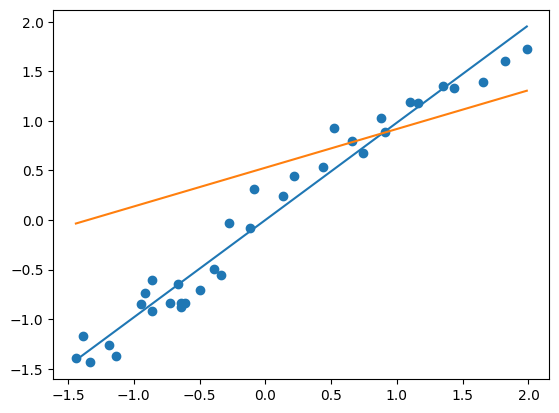

In [85]:
plt.scatter(x,y)
plt.plot(x,predict_y(x,weights,bias))
plt.plot(x,predict_y(x,w,b))